# _`automaton`_`.multiply(rhs, algo="auto")`

This function is overloaded, it supports multiple different signatures:

- _`automaton`_`.multiply(`_`aut`_`)`

  The product (i.e., the concatenation) of two automata.
  
  Precondition:
    - In case of deterministic multiplication, the labelset of _`aut`_ has to be free.
    
    
- _`automaton`_`.multiply(`_`num`_`)`

  The repeated multiplication (concatenation) of an automaton with itself.  Exponent `-1` denotes the infinity: the Kleene star.

- _`automaton`_`.multiply((`_`min`_`, `_`max`_`))`

  The sum of repeated multiplications of an automaton.

  Precondition:
    - _`min`_ ` <= ` _`max`_

An `algo` parameter can be added to specify how the multiplication should be performed.

- _`automaton`_`.multiply(`_`aut`_`,`_`algo`_`)`
- _`automaton`_`.multiply(`_`num`_`,`_`algo`_`)`
- _`automaton`_`.multiply((`_`min`_`, `_`max`_`)`_`,`_`algo)`

The algorithm has to be one of these:

- `"auto"`: default parameter, same as `"standard"`.
- `"deterministic"`: produces a deterministic result.
- `"general"`: introduces spontaneous transitions.
- `"standard"`: does not introduce spontaneous transitions.

Preconditions:
- `"deterministic"`: the automaton is free.

Postconditions:
- `"deterministic"`: the result is a deterministic automaton.
- `"standard"`: when applied to standard automata, the result is standard.
- `"general"`: the context of the result automaton is nullable.

Caveats:
- `"deterministic"`: the computation might not terminate on weighted automata.  See [automaton.determinize](automaton.determinize.ipynb).
  
See also:
- [expression.multiply](expression.multiply.ipynb)
- [polynomial.multiply](polynomial.multiply.ipynb)

## Examples

In [1]:
import vcsn
ctx = vcsn.context('lal_char, q')
def aut(e):
    return ctx.expression(e, 'none').standard()

### Simple Multiplication
Instead of `a.multiply(b)`, you may write `a * b`.

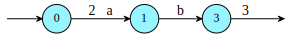

In [2]:
a = aut('<2>ab<3>'); a

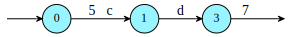

In [3]:
b = aut('<5>cd<7>'); b

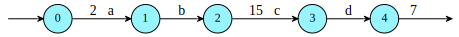

In [4]:
a * b

To force the execution of the general algorithm you can do it this way.

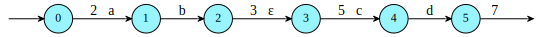

In [5]:
a.multiply(b, "general")

In order to satisfy any kind of input automaton, the general algorithm inserts a transition labelled by `one`,
from each final transition of the left hand side automaton to each initial transition of the right hand side one.

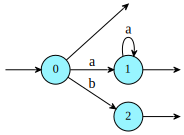

In [6]:
a = vcsn.B.expression('a*+b').automaton(); a

The `general` algorithm introduces spontaneous transitions.

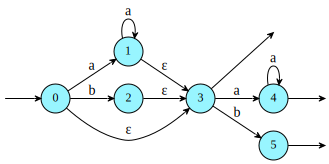

In [7]:
a.multiply(a, 'general')

When applied to standard automata, the `standard` multiplication yields a standard automaton.

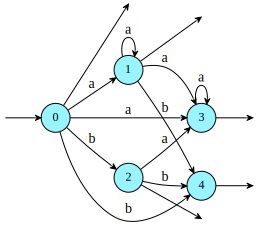

In [8]:
a.multiply(a, 'standard')

The `deterministic` version returns a deterministic automaton.

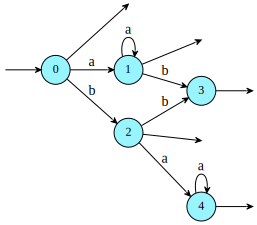

In [9]:
a.multiply(a, 'deterministic')

### Repeated Multiplication
Instead of `a.multiply(3)`, you may write `a ** 3`.  Beware that `a * 3` actually denotes `a.rweight(3)`.

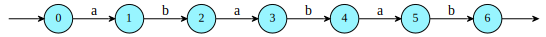

In [10]:
aut('ab') ** 3

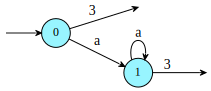

In [11]:
aut('a*') * 3

Use the exponent -1 to mean `infinity`.  Alternatively, you may invoke `a.star` instead of `a ** -1`.

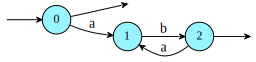

In [12]:
aut('ab') ** -1

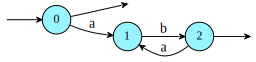

In [13]:
aut('ab').star()

### Sums of Repeated Multiplications
Instead of `a.multiply((2, 4))`, you may write `a ** (2, 4)`.  Again, use exponent -1 to mean infinity.

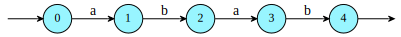

In [14]:
aut('ab') ** (2, 2)

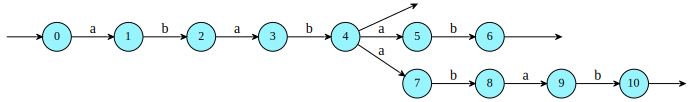

In [15]:
aut('ab') ** (2, 4)

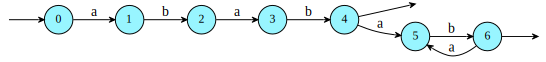

In [16]:
aut('ab') ** (2, -1)

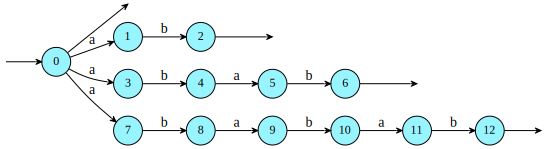

In [17]:
aut('ab') ** (-1, 3)

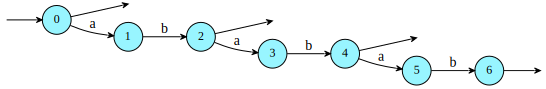

In [18]:
aut('ab').multiply((-1, 3), "deterministic")

In some cases applying proper to the result automaton of the general algorithm will give you the result of the standard algorithm.

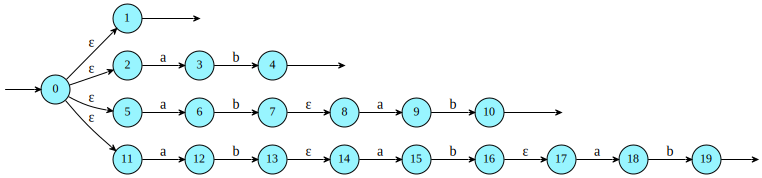

In [19]:
aut('ab').multiply((-1, 3), "general")

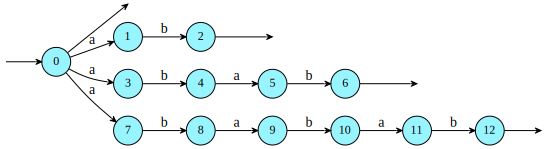

In [20]:
aut('ab').multiply((-1, 3), "general").proper()